<a href="https://colab.research.google.com/github/nafl13/ICT_DSA/blob/Assignments/Loan_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

!pip install xgboost

from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/train_ctrUa4K.csv')
df_test = pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df_test.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median())
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].median())
df_test['Dependents'] = df_test['Dependents'].fillna(df_test['Dependents'].mode()[0])
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0])

In [ ]:
df_test.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop('Loan_ID', axis=1)
test_loan_id = df_test['Loan_ID']
df_test = df_test.drop('Loan_ID', axis=1)

In [ ]:
for col in df.columns:
  unique_vals = df[col].unique()
  print(f"Column '{col}':")
  print(unique_vals)
  print(f"Total unique values: {len(unique_vals)}")
  print("-" * 20)


Column 'Gender':
['Male' 'Female']
Total unique values: 2
--------------------
Column 'Married':
['No' 'Yes']
Total unique values: 2
--------------------
Column 'Dependents':
['0' '1' '2' '3+']
Total unique values: 4
--------------------
Column 'Education':
['Graduate' 'Not Graduate']
Total unique values: 2
--------------------
Column 'Self_Employed':
['No' 'Yes']
Total unique values: 2
--------------------
Column 'ApplicantIncome':
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  38

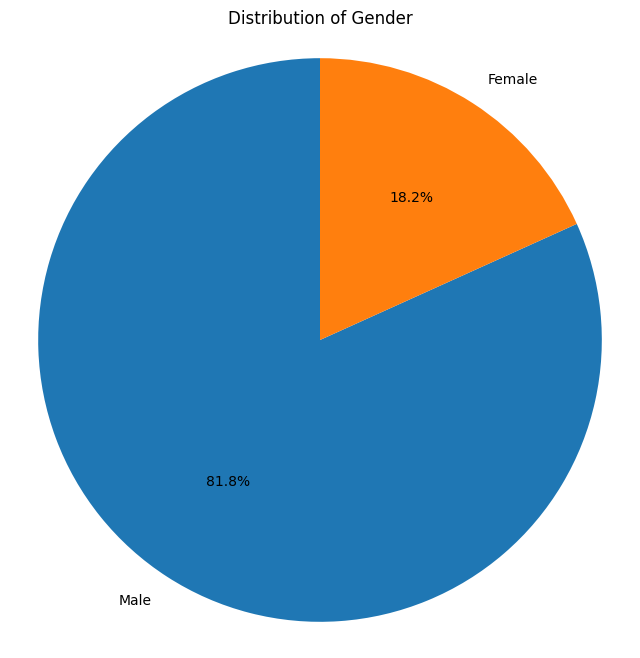

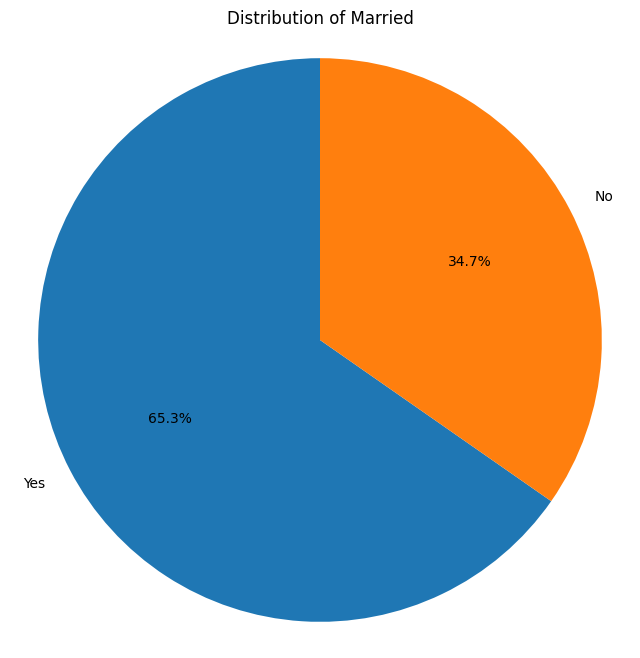

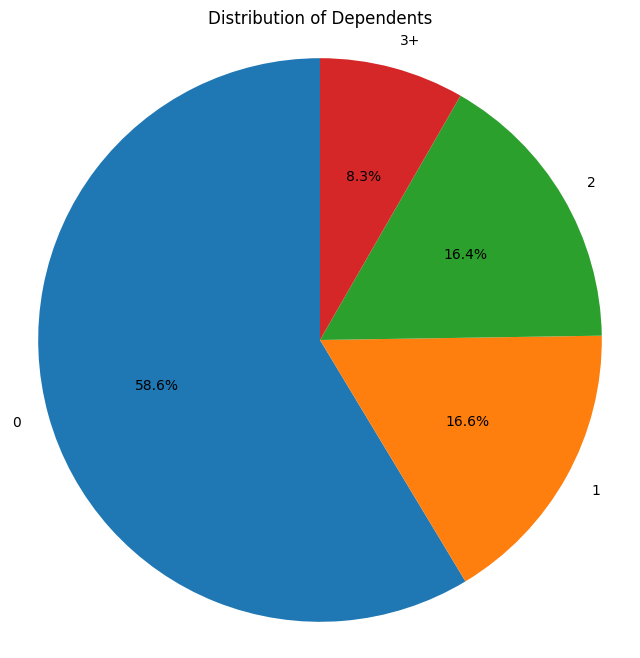

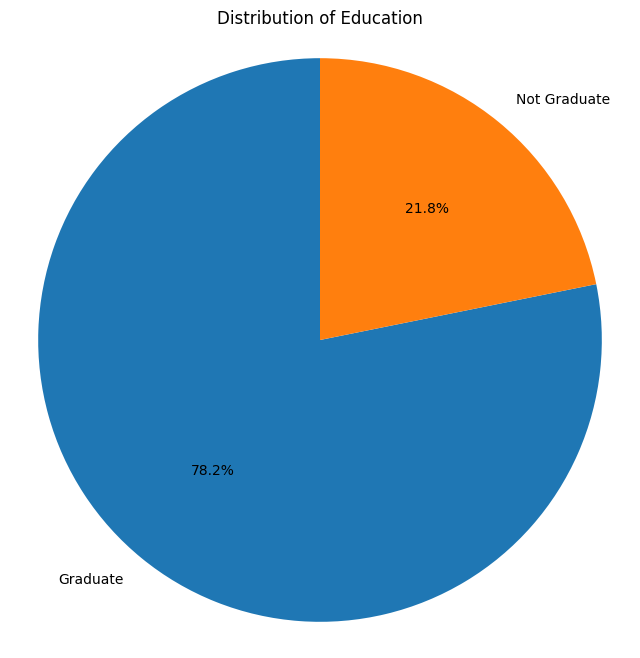

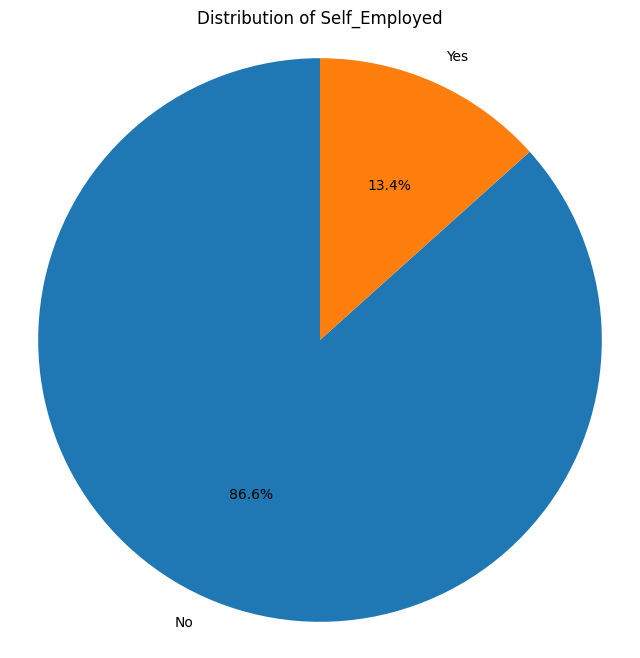

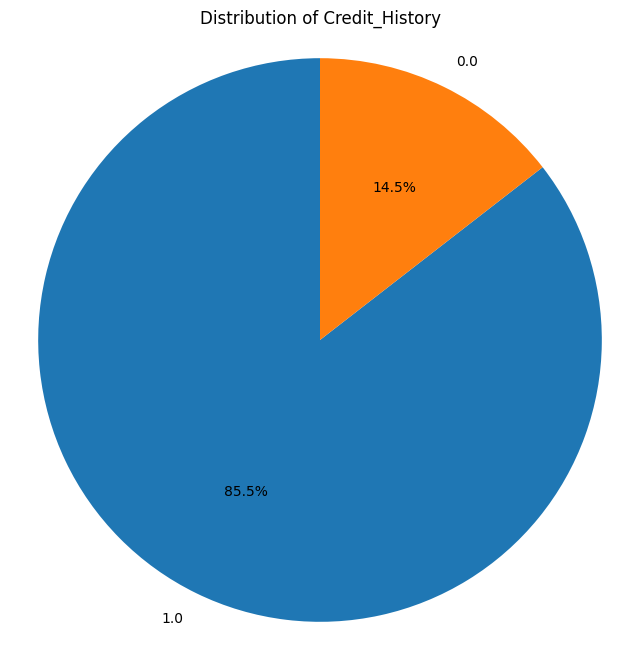

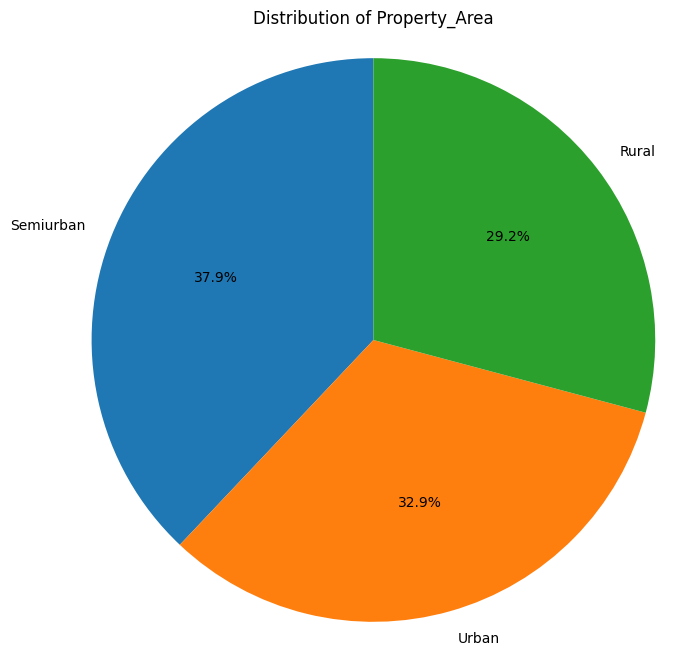

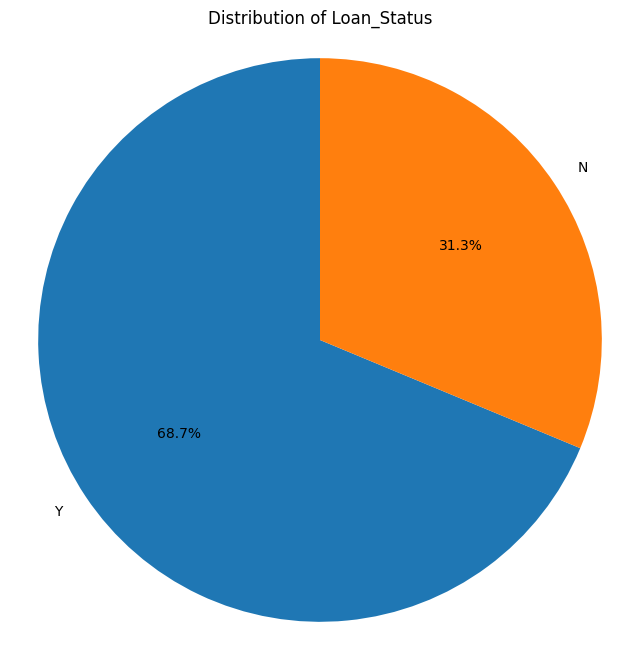

In [ ]:
columns_to_plot = [col for col in df.columns if col not in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

# Iterate through the selected columns
for col in columns_to_plot:
  value_counts = df[col].value_counts()

  # Create the pie chart
  plt.figure(figsize=(8, 8))
  plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribution of {col}')
  plt.axis('equal')
  plt.show()


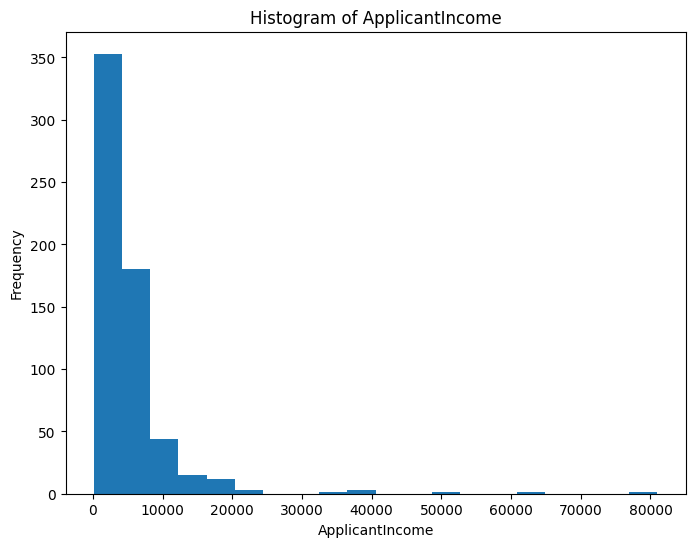

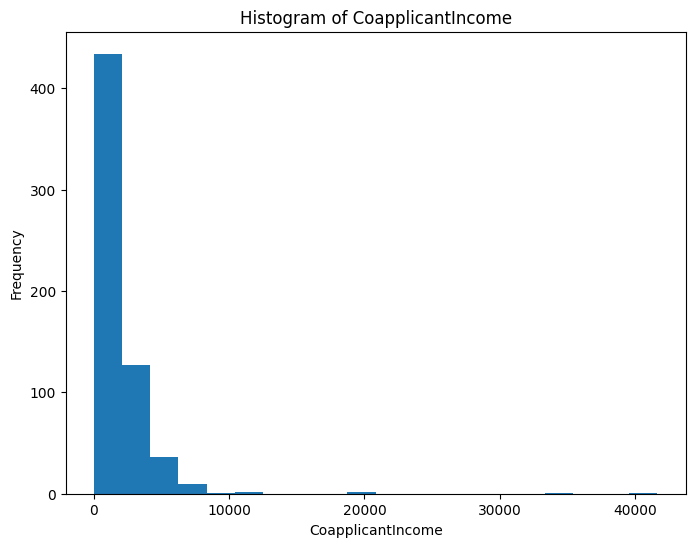

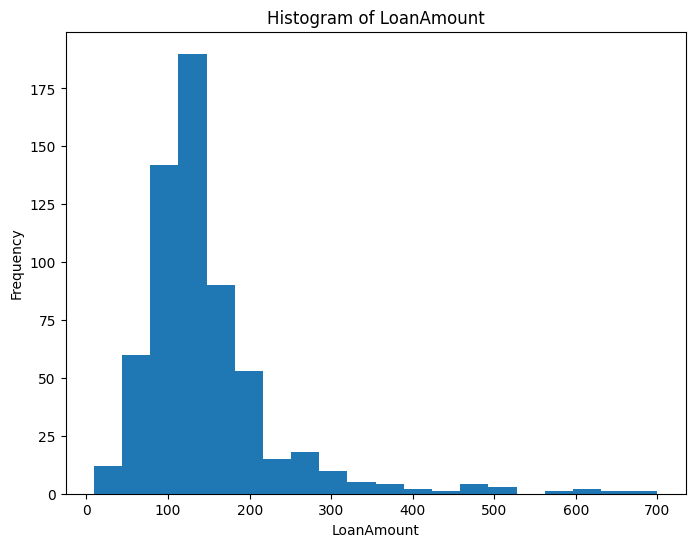

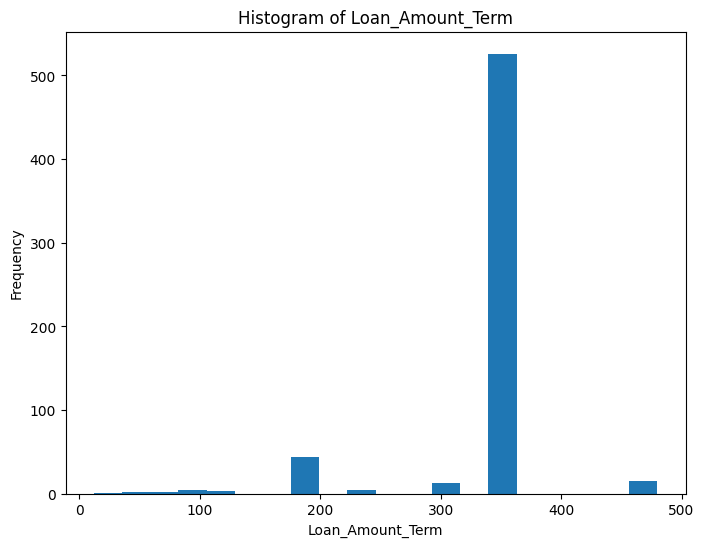

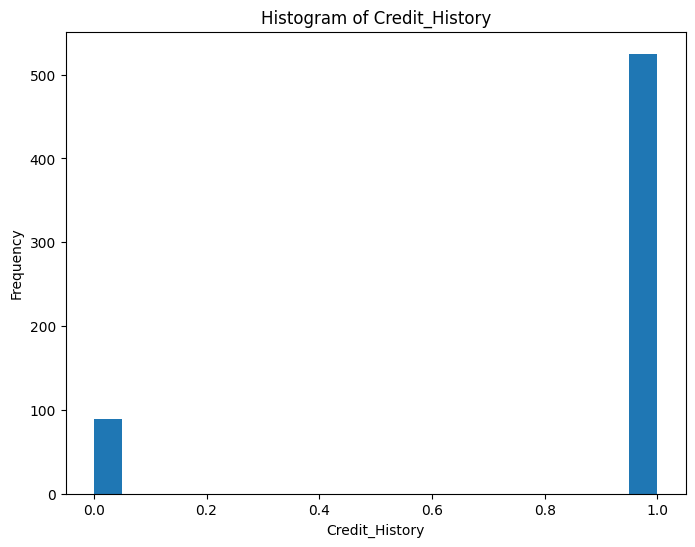

In [ ]:

numerical_cols = df.select_dtypes(include=np.number).columns

# Plot histograms for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col], bins=20)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


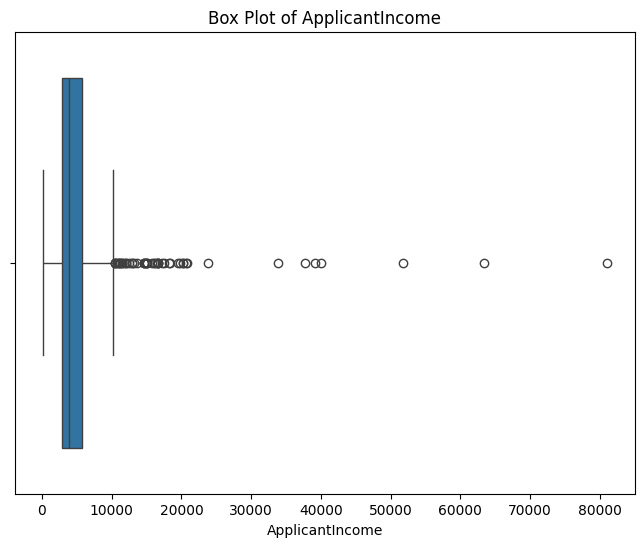

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


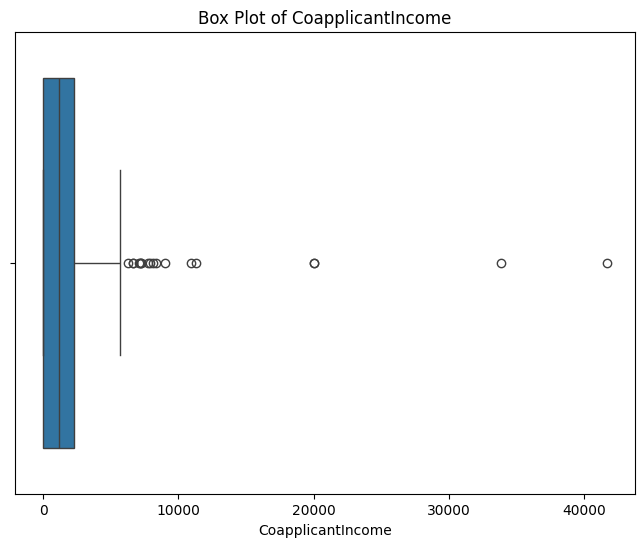

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


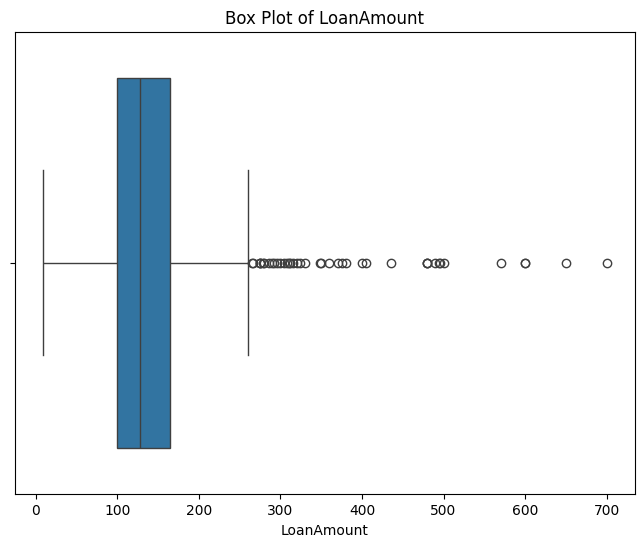

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


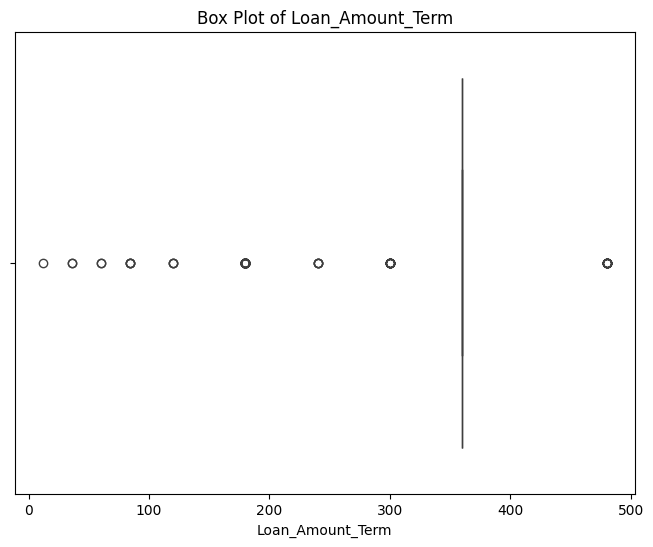

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


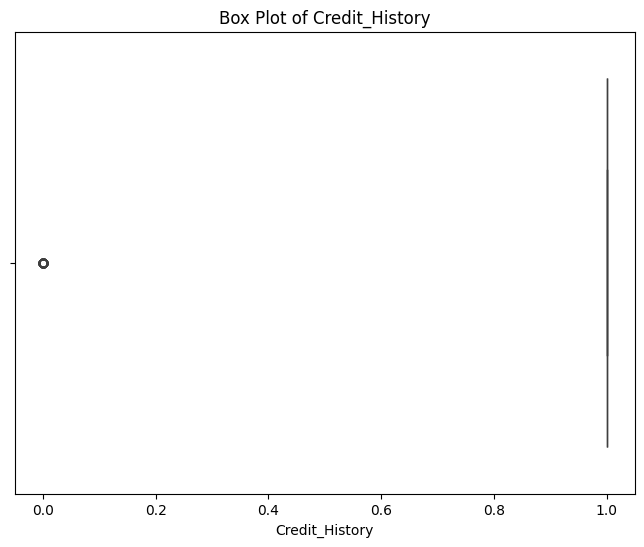

In [ ]:
# Plot box plots for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.xlabel(col)
  plt.title(f'Box Plot of {col}')
  plt.show()


In [ ]:
outlier_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
#handling the outliers using clipping method
for column in outlier_cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column] = df[column].clip(lower_bound, upper_bound)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


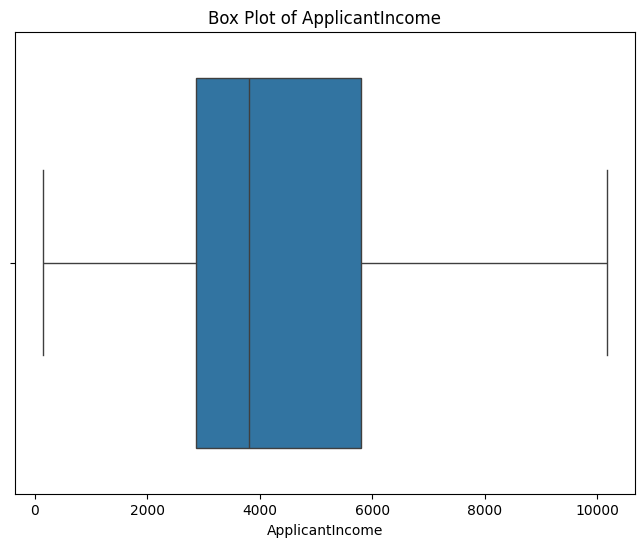

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


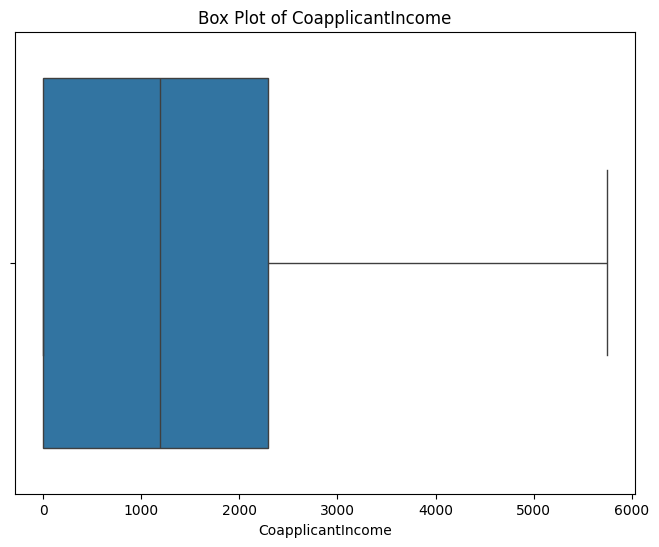

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


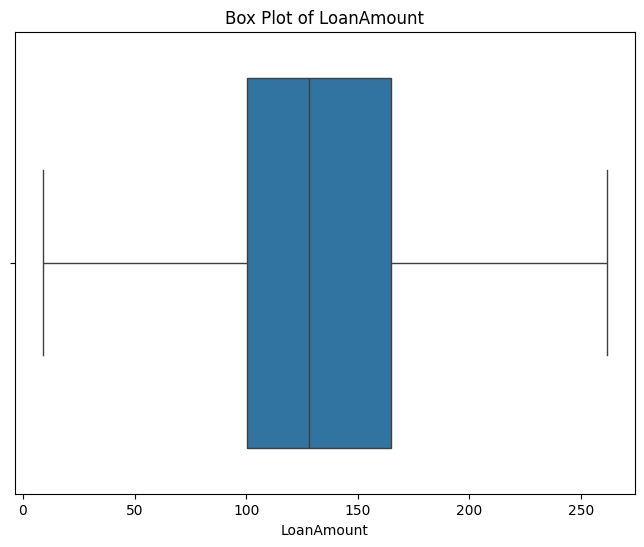

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


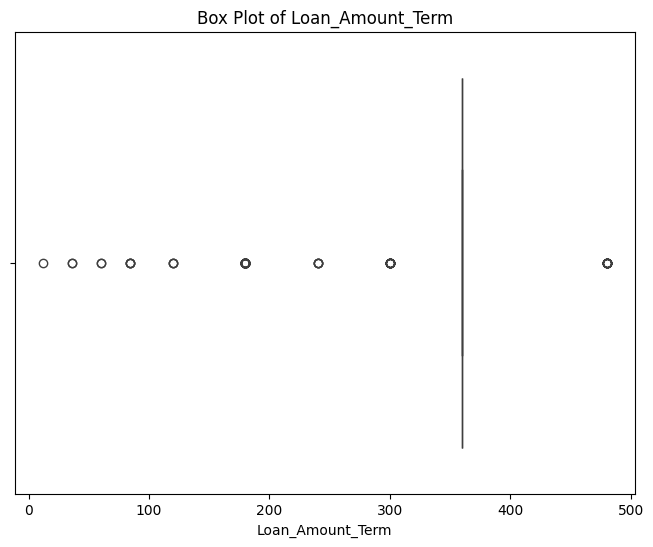

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


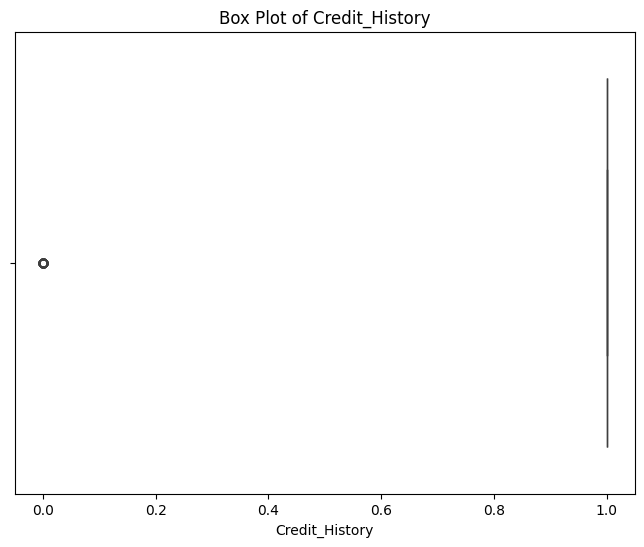

In [ ]:
# Plot box plots for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.xlabel(col)
  plt.title(f'Box Plot of {col}')
  plt.show()


In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

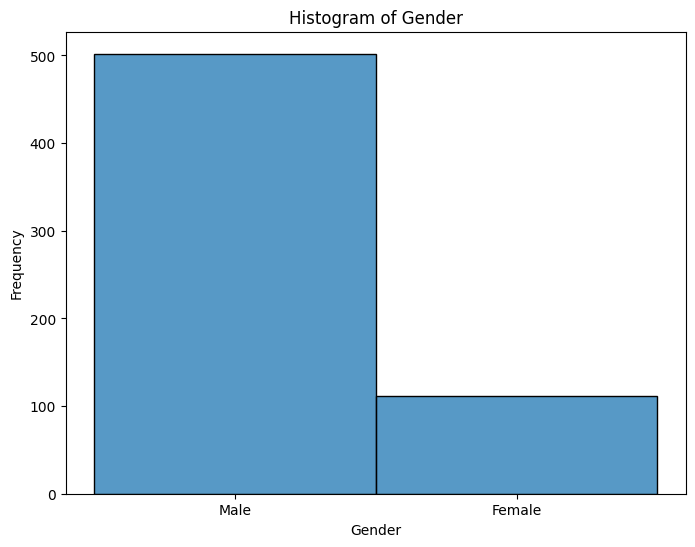

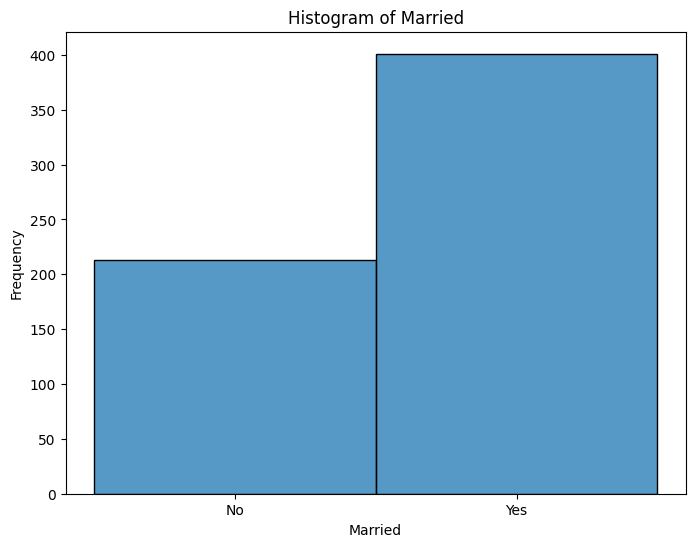

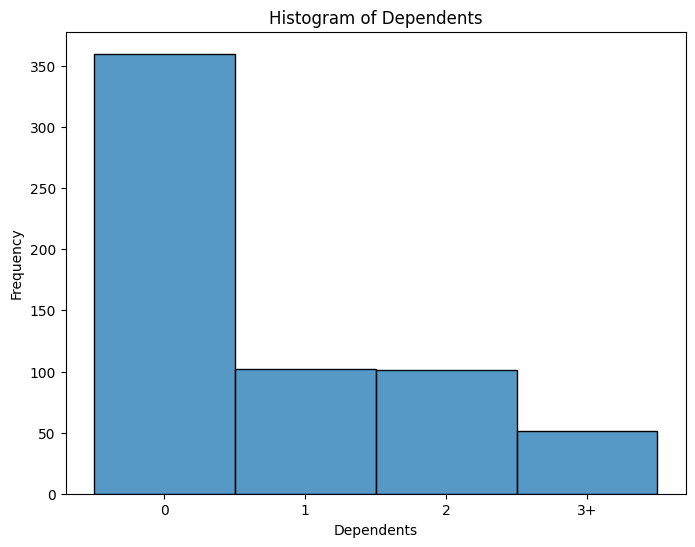

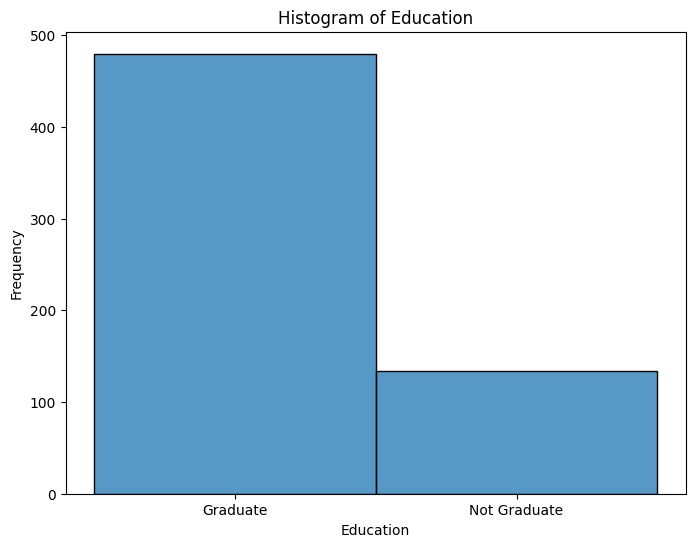

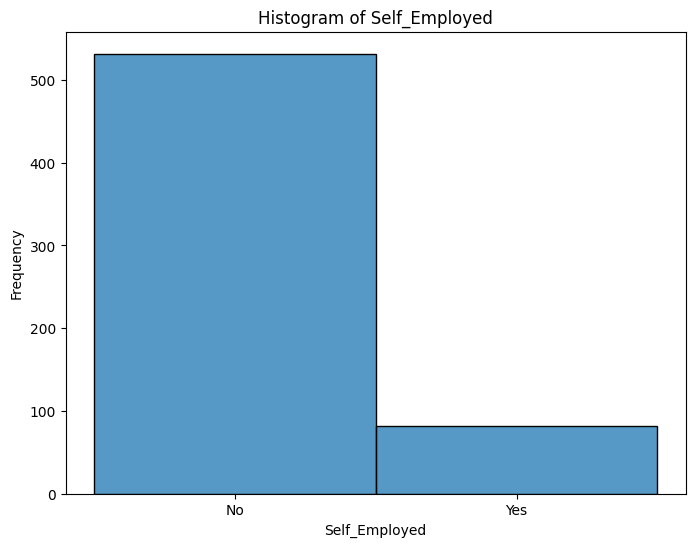

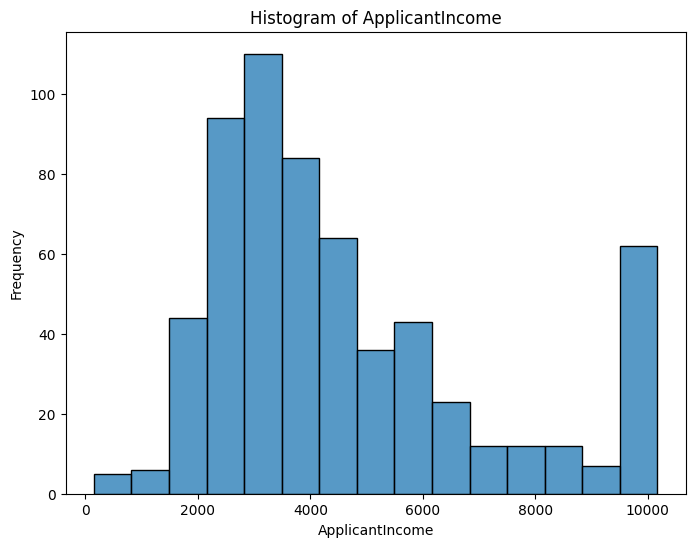

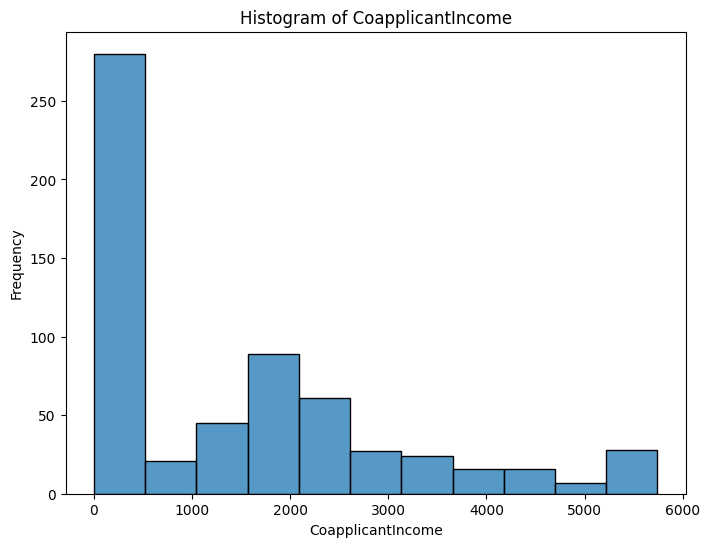

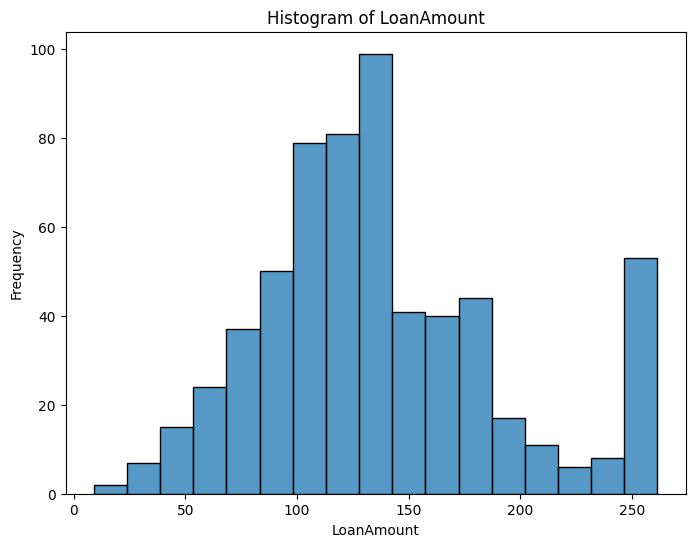

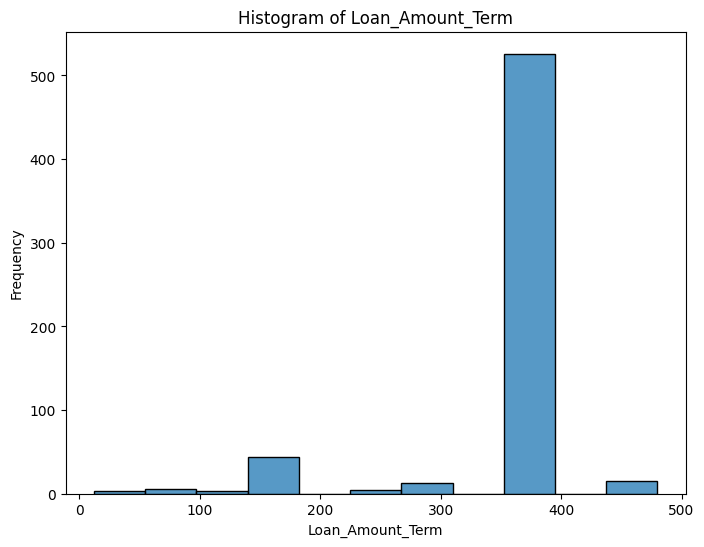

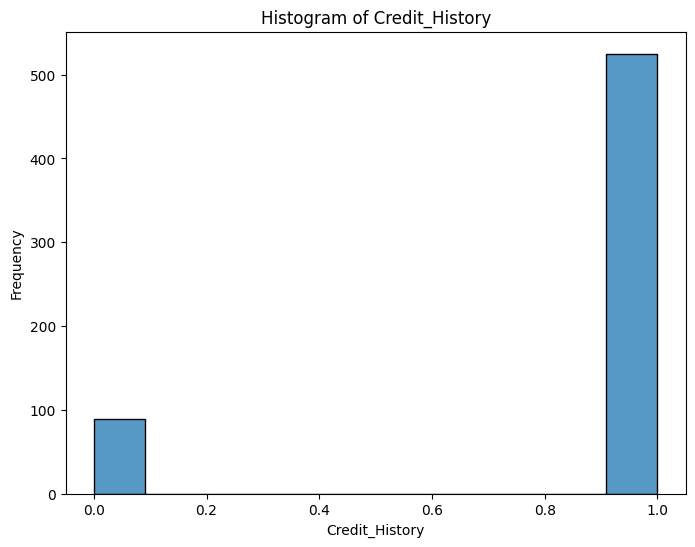

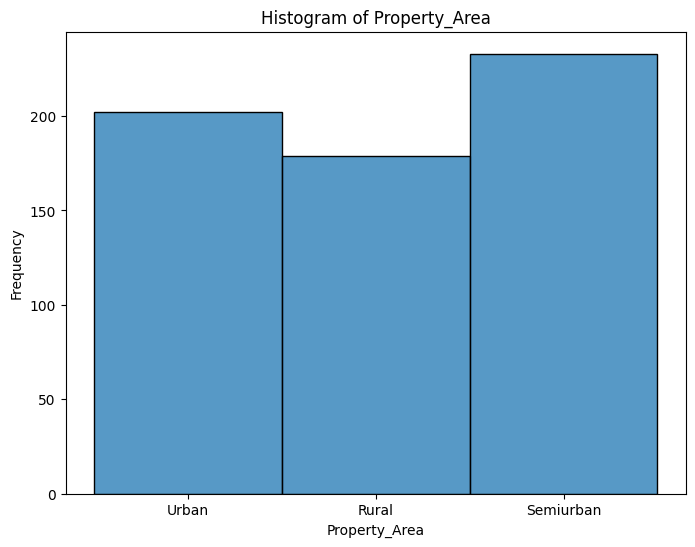

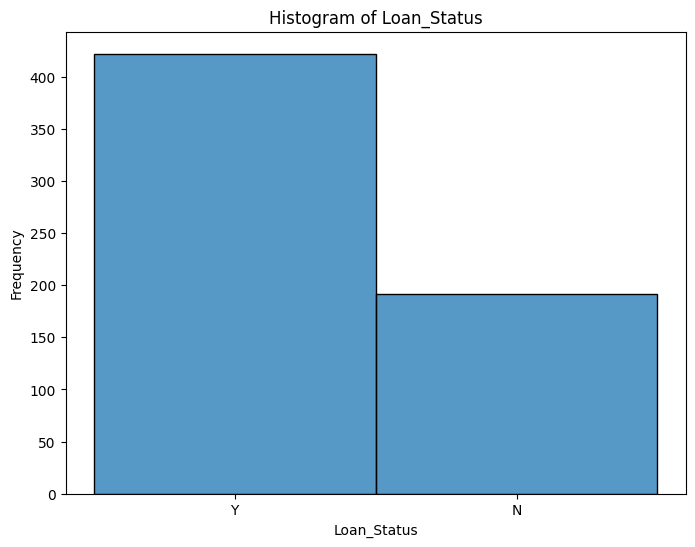

In [ ]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column])
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')
  plt.show()


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

oe = OrdinalEncoder(categories=[['No', 'Yes']])
df['Married'] = oe.fit_transform(df[['Married']])
df_test['Married'] = oe.fit_transform(df_test[['Married']])

oe = OrdinalEncoder(categories=[['0','1', '2', '3+']])
df['Dependents'] = oe.fit_transform(df[['Dependents']])
df_test['Dependents'] = oe.fit_transform(df_test[['Dependents']])

oe = OrdinalEncoder(categories=[['Not Graduate', 'Graduate']])
df['Education'] = oe.fit_transform(df[['Education']])
df_test['Education'] = oe.fit_transform(df_test[['Education']])

oe = OrdinalEncoder(categories=[['No', 'Yes']])
df['Self_Employed'] = oe.fit_transform(df[['Self_Employed']])
df_test['Self_Employed'] = oe.fit_transform(df_test[['Self_Employed']])

oe = OrdinalEncoder(categories=[['Rural','Semiurban','Urban']])
df['Property_Area'] = oe.fit_transform(df[['Property_Area']])
df_test['Property_Area'] = oe.fit_transform(df_test[['Property_Area']])

oe = OrdinalEncoder(categories=[['N','Y']])
df['Loan_Status'] = oe.fit_transform(df[['Loan_Status']])


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0.0,1.0,0.0,0.568692,0.000000,0.471287,0.74359,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.442360,0.262575,0.471287,0.74359,1.0,0.0,0.0
2,1,1.0,0.0,1.0,1.0,0.284396,0.000000,0.225743,0.74359,1.0,2.0,1.0
3,1,1.0,0.0,0.0,0.0,0.242784,0.410578,0.439604,0.74359,1.0,2.0,1.0
4,1,0.0,0.0,1.0,0.0,0.583760,0.000000,0.522772,0.74359,1.0,2.0,1.0


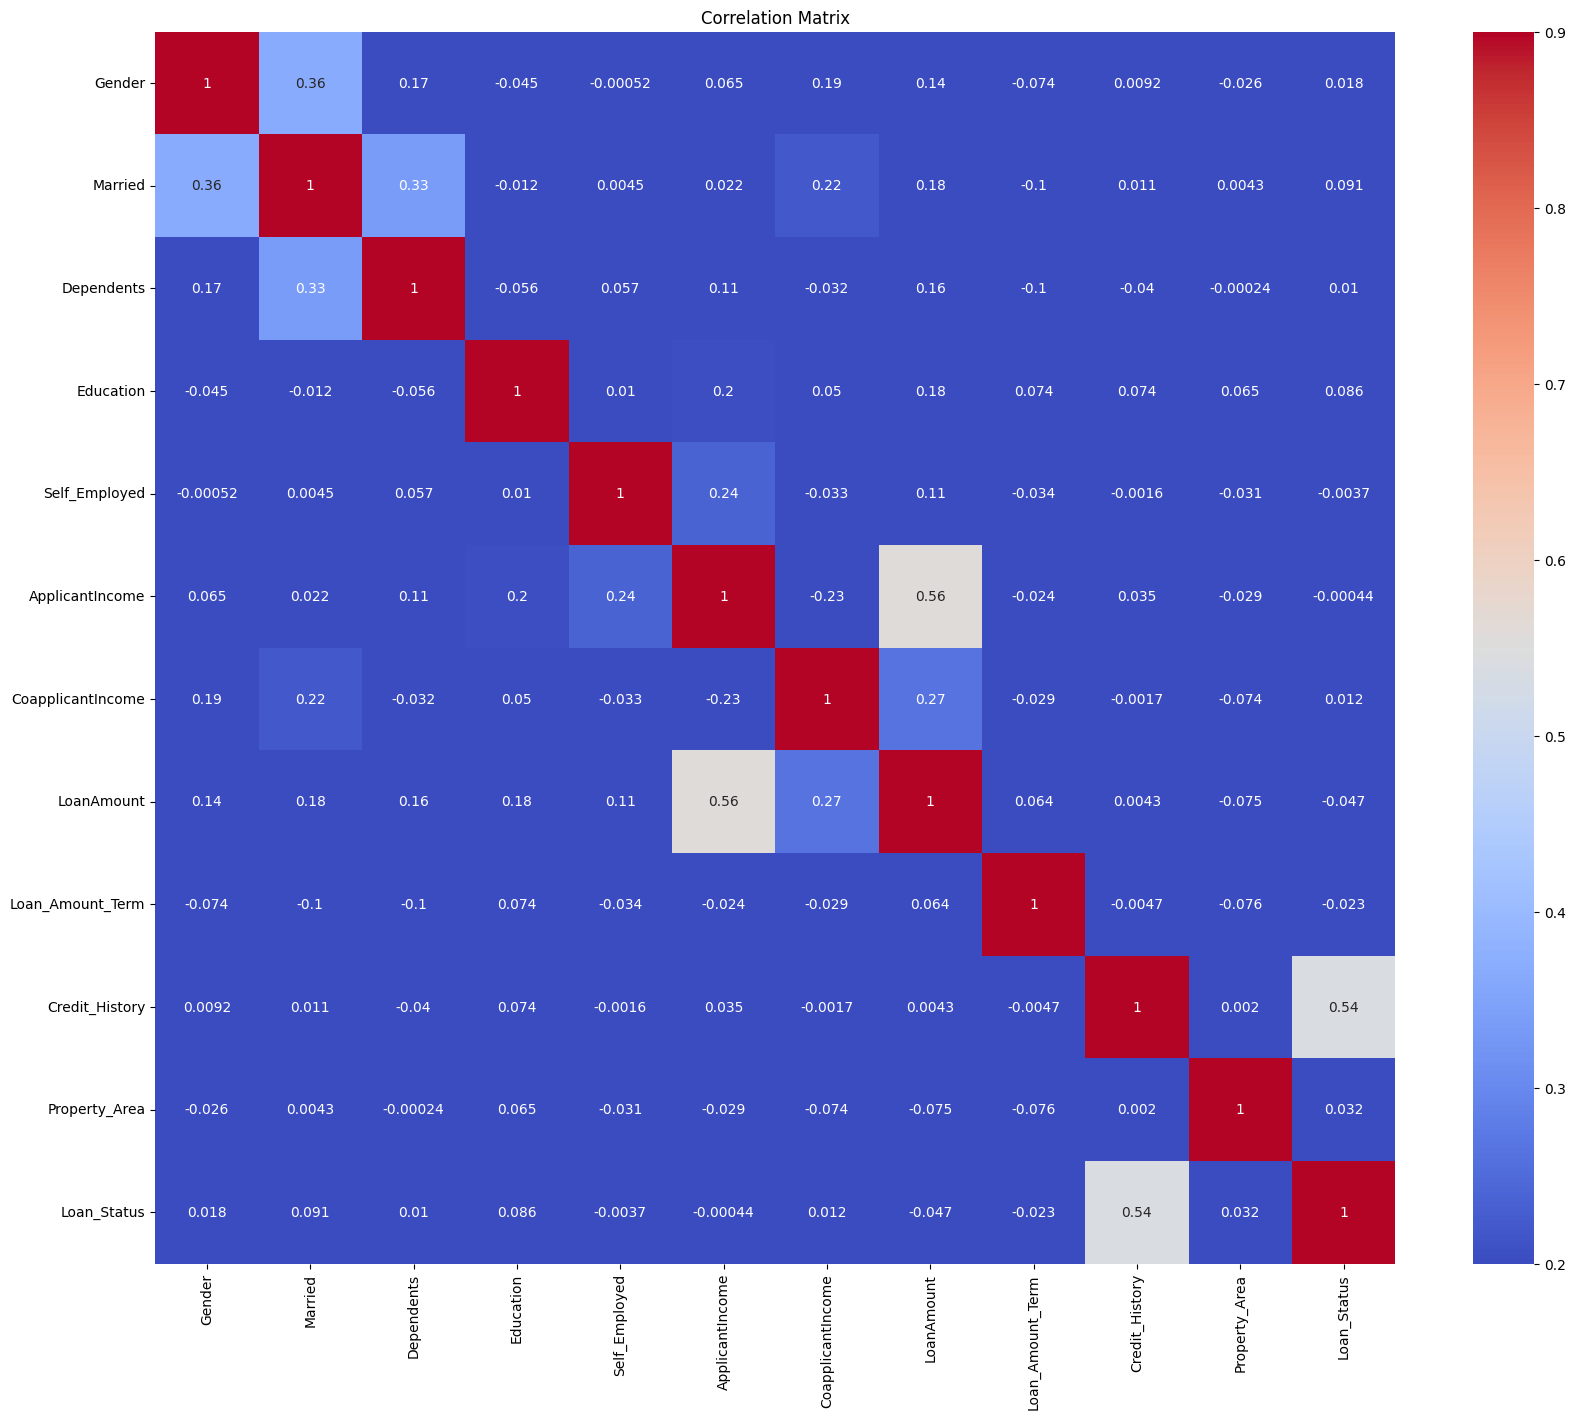

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True,vmin = 0.2,vmax=0.9, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train = X
y_train = y


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.39      0.91      0.55        43
         1.0       0.83      0.24      0.37        80

    accuracy                           0.47       123
   macro avg       0.61      0.57      0.46       123
weighted avg       0.67      0.47      0.43       123



XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [ ]:
# prompt: tune xgb model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_xgb_best = best_xgb_model.predict(X_val)

# Evaluate the best model
print("Best XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb_best))

# Predict on the test set using the best model
y_pred_test_xgb_best = best_xgb_model.predict(df_test)

# Convert predictions to original labels if needed
# y_pred_test_xgb_best = oe.inverse_transform(y_pred_test_xgb_best.reshape(-1, 1))

# Create a submission DataFrame
submission_df_xgb_best = pd.DataFrame({'Loan_ID': test_loan_id, 'Loan_Status': y_pred_test_xgb_best})

# Save the submission file
submission_df_xgb_best['Loan_Status'] = submission_df_xgb_best['Loan_Status'].astype(int)
submission_df_xgb_best['Loan_Status'] = submission_df_xgb_best['Loan_Status'].map({0:'N', 1:'Y'})
submission_df_xgb_best.to_csv('submission_xgb_best.csv', index=False)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best accuracy found:  0.8110888977742237
Best XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.58      0.72        43
         1.0       0.81      0.99      0.89        80

    accuracy                           0.85       123
   macro avg       0.89      0.78      0.81       123
weighted avg       0.87      0.85      0.83       123



In [ ]:
# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))

# Predict on the test set
y_pred_test_xgb = xgb_model.predict(df_test)

# Create a submission DataFrame
submission_df_xgb = pd.DataFrame({'Loan_ID': test_loan_id, 'Loan_Status': y_pred_test_xgb})

# Save the submission file
submission_df_xgb['Loan_Status'] = submission_df_xgb['Loan_Status'].astype(int)
submission_df_xgb['Loan_Status'] = submission_df_xgb['Loan_Status'].map({0:'N', 1:'Y'})
submission_df_xgb.to_csv('submission_xgb.csv', index=False)


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

